<a href="https://colab.research.google.com/github/yavuzim/voice-preprocessing/blob/main/Colaboratory'ye_Ho%C5%9F_Geldiniz.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import librosa
import numpy as np

# Ses dosyasını yükleme
voice_file = 'audio_file'
y, sr = librosa.load(f'{voice_file}.wav', sr=None)
print(y, sr)

# Normalizasyon
y_normalized = y / np.max(np.abs(y))
print(y_normalized)


[ 0.          0.          0.         ... -0.03256226 -0.0448761
 -0.05226135] 44100
[ 0.          0.          0.         ... -0.04742433 -0.06535846
 -0.07611449]


In [5]:
!pip install noisereduce

In [21]:
from noisereduce import reduce_noise
import librosa
import soundfile as sf

voice_file = 'audio_file'
# Ses dosyasını yükleme
audio = AudioSegment.from_wav(f"{voice_file}.wav")

# Gürültü azaltma
y_reduced = reduce_noise(y=y, sr=sr)

# Gürültü azaltılmış dosyanın adını belirleme
output_file = f"{voice_file}_gurultuazalt.wav"

# Dosyayı kaydetme
sf.write(output_file, y_reduced, sr)

print(f"Gürültüsü azaltılmış ses '{output_file}' olarak kaydedildi.")


Gürültüsü azaltılmış ses 'gurultuluses_gurultuazalt.wav' olarak kaydedildi.


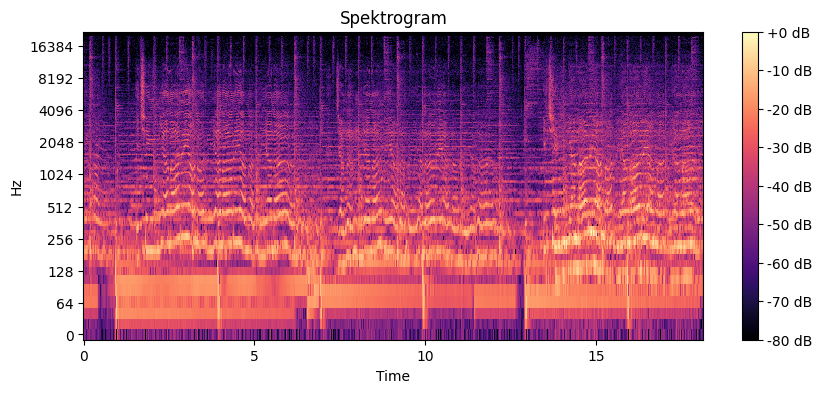

In [9]:
import librosa
import numpy as np
import matplotlib.pyplot as plt

y, sr = librosa.load(f'{voice_file}.wav', sr=None)

# Fourier Transform (FFT)
D = np.abs(librosa.stft(y))

# Görselleştirme
plt.figure(figsize=(10, 4))
librosa.display.specshow(librosa.amplitude_to_db(D, ref=np.max), sr=sr, x_axis='time', y_axis='log')
plt.colorbar(format='%+2.0f dB')
plt.title('Spektrogram')
plt.show()


In [20]:
# Özellik Çıkarma

mfccs = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=13)
zcr = librosa.feature.zero_crossing_rate(y=y)
spectral_centroid = librosa.feature.spectral_centroid(y=y, sr=sr)

In [19]:
from pydub import AudioSegment
from pydub.silence import split_on_silence

voice_file = 'audio_file'
# Ses dosyasını yükleme
audio = AudioSegment.from_wav(f"{voice_file}.wav")

# Sessizliği kaldırma (eşik ve minimum sessizlik uzunluğu ayarı)
chunks = split_on_silence(audio, min_silence_len=500, silence_thresh=-30)

# Sessizliği kaldırılmış sesin birleştirilmesi
processed_audio = AudioSegment.empty()
for chunk in chunks:
    processed_audio += chunk

# Dosyayı kaydetme
output_file = f"{voice_file}_sessiz_kaldirildi.wav"
processed_audio.export(output_file, format="wav")

print(f"Sessiz kısımları kaldırılmış ses '{output_file}' olarak kaydedildi.")


Sessiz kısımları kaldırılmış ses 'myses_sessiz_kaldirildi.wav' olarak kaydedildi.


In [12]:
# Hız Değişikliği
y_fast = librosa.effects.time_stretch(y, rate=1.5)

# Gürültü Ekleme
noise = np.random.normal(0, 0.01, y.shape)
y_noisy = y + noise


In [13]:
!pip install pydub

In [14]:
from pydub import AudioSegment
from pydub.silence import split_on_silence

sound = AudioSegment.from_wav(f'{voice_file}.wav')
chunks = split_on_silence(sound, min_silence_len=500, silence_thresh=-40)

# Parçaları kaydetme
for i, chunk in enumerate(chunks):
    chunk.export(f"chunk{i}.wav", format="wav")
